# Making Movies with `matplotlib` <img src="images/JHI_STRAP_Web.png" style="width: 150px; float: right;">

<div class="alert alert-success">
<h2>Introduction</h2>
</div>

`matplotlib` provides tools for producing animations from its plots. Animations can provide compelling visuals to get ones point across, and represent information in ways that are not possible with static views. But these tools are not exempt from the usual principles of good graphical representation, and they also bring new considerations, such as presenting only single frame 'snapshots' of data at any one time, rather than a complete account of the dataset.

<div class="alert alert-warning">
<b>NOTE:</b> Writing movies from <b>matplotlib</b> requires <b>FFmpeg</b> or <b>mencoder</b> to be installed - an additional requirement - and for an animated <b>.gif</b>, an extra step of encoding from <b>.mp4</b> is necessary.
</div>

* `FFmpeg`: [https://ffmpeg.org/](https://ffmpeg.org/)
* `MPlayer`/`MEncoder`: [http://www.mplayerhq.hu](http://www.mplayerhq.hu/design7/news.html)

`matplotlib`'s central animation functionality is built around the `animation` module, and in this exercise we will use the `FuncAnimation()` class to generate an animated view onto the `gapminder` data that is also used in the *Grammar of Graphics* exercise.

#### Python imports

The code in the cell below suppresses noisy warnings from `matplotlib` and `pandas`

In [1]:
import warnings
warnings.filterwarnings('ignore')

We will use the `pylab` *magic* to make `matplotlib` available, and import `seaborn` as the `sns` *namespace*.

We also need to import the `animation` module explicitly, as this is not provided by `pylab`, and to visualise the animation in the notebook we need to enable generation of HTML5 movies with the `HTML` module from `IPython.display`.

```python
# Import ggplot and pandas modules
%pylab inline

from matplotlib import animation
import seaborn as sns

from IPython.display import HTML
```

In [2]:
# Imports
%pylab inline

from matplotlib import animation
import seaborn as sns

from IPython.display import HTML

Populating the interactive namespace from numpy and matplotlib


### Learning Outcomes

* Understand `matplotlib`'s `animation` functionality
* Generate animations using `FuncAnimation`

<div class="alert alert-success">
<h2>Exercise</h2>
</div>

<div class="alert alert-success">
<h3>1. Producing a Basic Animation</h3>
</div>

In this part of the exercise, you will produce an animation of a sine wave function, to explore the principles of the `FuncAnimation()` class.

<div class="alert alert-warning">
The general principle of animation is that apparent movement is built up from a series of still images - <i>frames</i> - which switch too fast for the eye to perceive, giving the impression of movement. Here, each still image is a single <b>matplotlib</b> or <b>seaborn</b> plot.
</div>

The generation of individual images is handled by the `FuncAnimation()` class. This needs to know how many *frames* to draw, and the time interval between frames, so they can all be compiled together in a movie.

To draw each frame, `FuncAnimation()` calls a function (which you will name below), which renders each frame in sequence, passing 

Firstly, you need to set up a `figure()` in which the plot will be rendered.

Here, we will create the `figure()` object `fig`, and add subplot axes `ax` to describe the plot itself, setting *x*- and *y*-axis limits appropriate for a *sin* wave plot. So far, this is just like creating a static figure

```python
fig = figure()
ax = fig.add_subplot(1, 1, 1,
                     xlim=(0, 2), ylim=(-2, 2))
```

We want to draw a single line plot of *f(x) = sin(x)* where *x* is in the range [0, 2). To do this we would use a line plot, so we add an `ax.plot()` object, which holds the graphical object that will be drawn, and assign this to the variable `line`. Initially, we provide *empty data* in the form of two empty lists as *x* and *y* data, so that no line is drawn. We set a slightly thicker line than usual with `lw=2` as an option.

```python
line, = ax.plot([], [], lw=2)
```

We will also, for illustration, write some text to indicate which frame number is being rendered, using an `ax.text()` object. Again, initially this is set to an empty string to give a 'clean' plot:

```python
text = ax.text(0, 1.75, '')
```

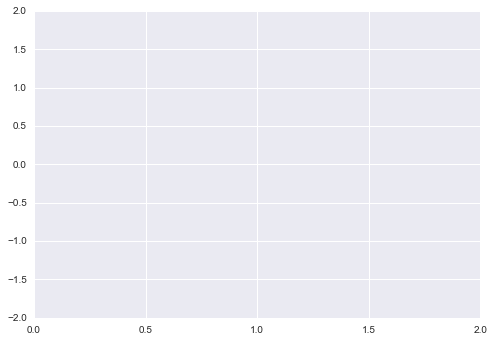

In [3]:
# Use this cell to create the clean base plot with the code above
fig = figure()
ax = fig.add_subplot(1, 1, 1,
                     xlim=(0, 2), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)
text = ax.text(0, 1.75, '')

The `animation.FuncAnimation()` function will allow us to specify an `init_func` which draws a clear frame; if we don't do this, then the first item in the sequence will be retained throughout the animation. We need, therefore, to provide a function that clears the data from the aniated graph.

We will call this function `init_sine()` and use it to clear the `line` data and `text` string from the plot:

```python
def init_sine():
    line.set_data([], [])
    text.set_text('')
    return(line, text)
```

In [4]:
# Create the function for init_func in this cell
def init_sine():
    line.set_data([], [])
    text.set_text('')
    return(line, text)

Now we create the function that will be called by `animation.FuncAnimation()`. We will call it `animate_sine()`, and it will receive the number of the frame being rendered, when it is called from `FuncAnimation()` - we catch this as the function parameter `i`.

Within the body of the function we write the code to render the *sin* curve:

```python
def animate_sine(i):
    x = linspace(0, 2, 1000)
    y = sin(2 * pi * x)
    line.set_data(x, y)
    text.set_text('frame: {0}'.format(i))
    return(line, text)
```

First we generate a *linear space* of 1000 *x* values in the range [0, 2), and then apply the function $y = \sin(2\pi x)$. This gives us two arrays of variables in `x` and `y`. These are then passed to the `line` object as the data to plot, with `line.set_data(x, y)`, and the frame number caught in the parameter `i` is written with `text.set_text()`.

In [5]:
# Create the animate_sine() function in this cell
def animate_sine(i):
    x = linspace(0, 2, 1000)
    y = sin(2 * pi * x)
    line.set_data(x, y)
    text.set_text('frame: {0}'.format(i))
    return(line, text)

Now we can create the `FuncAnimation()` object, passing it the figure to render, and the initialisation (`init_sine()`) and animation (`animate_sine()`) functions, specifying the number of `frames` and the time `interval` between frames in ms. 

```python
anim = animation.FuncAnimation(fig, animate_sine, init_func=init,
                               frames=100, interval=20, blit=True)
```

<div class="alert alert-warning">
The <b>blit</b> option tells the animation only to redraw elements of the plot that have changed, and speeds up rendering.
</div>

In [6]:
# Create the FuncAnimation object in this cell
anim = animation.FuncAnimation(fig, animate_sine, init_func=init_sine,
                               frames=100, interval=20, blit=True)

To render the animation in the notebook, we use the `FuncAnimation()` class' `to_html5_video()` method, and the `IPython` `HTML` class.

```python
HTML(anim.to_html5_video())
```

In [7]:
# Render the animation in this cell
HTML(anim.to_html5_video())

This may not be what you expect. There is clearly an animation, but while the frame number is being reported with each change of frame, the sine wave is not moving.

The sine wave is being updated on each frame, but the same data is being plotted over and over again. We need to link the sine wave rendering with the frame number that's being passed, in order to cause the image to change.

We can do this by changing the was `y` is specified in the `animate_sine()` function from `y = sin(2 * pi * x)` to an expression involving `i`, such as:

```python
y = sin(2 * pi * (x - 0.01 * i))
```

which steps the curve along the *x*-axis in increments of 0.01.

In [8]:
# Change the animate_sine() function in this cell, and rerender the animation.
def animate_sine(i):
    x = linspace(0, 2, 1000)
    y = sin(2 * pi * (x - 0.01 * i))
    line.set_data(x, y)
    text.set_text('frame: {0}'.format(i))
    return(line, text)

anim = animation.FuncAnimation(fig, animate_sine, init_func=init_sine,
                               frames=100, interval=20, blit=True)

HTML(anim.to_html5_video())